In [1]:
import pandas as pd
import numpy as np
import pickle
import keras 
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import SGD
from keras.metrics import top_k_categorical_accuracy

import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
with open('171_Project_Data/pikle/xtrain_doodle.pickle', 'rb') as f:
    X_train = pickle.load(f)

with open('171_Project_Data/pikle/xtest_doodle.pickle', 'rb') as f:
    X_test = pickle.load(f)

with open('171_Project_Data/pikle/ytrain_doodle.pickle', 'rb') as f:
    y_train = pickle.load(f)

with open('171_Project_Data/pikle/ytest_doodle.pickle', 'rb') as f:
    y_test = pickle.load(f)
    
X_train = X_train.reshape(24000,28,28)
X_test = X_test.reshape(6000,28,28)
labels = ['ant', 'bear', 'bee', 'cat', 'crab', 'dragon', 'elephant', 'mouse', 'sea turtle', 'snail']

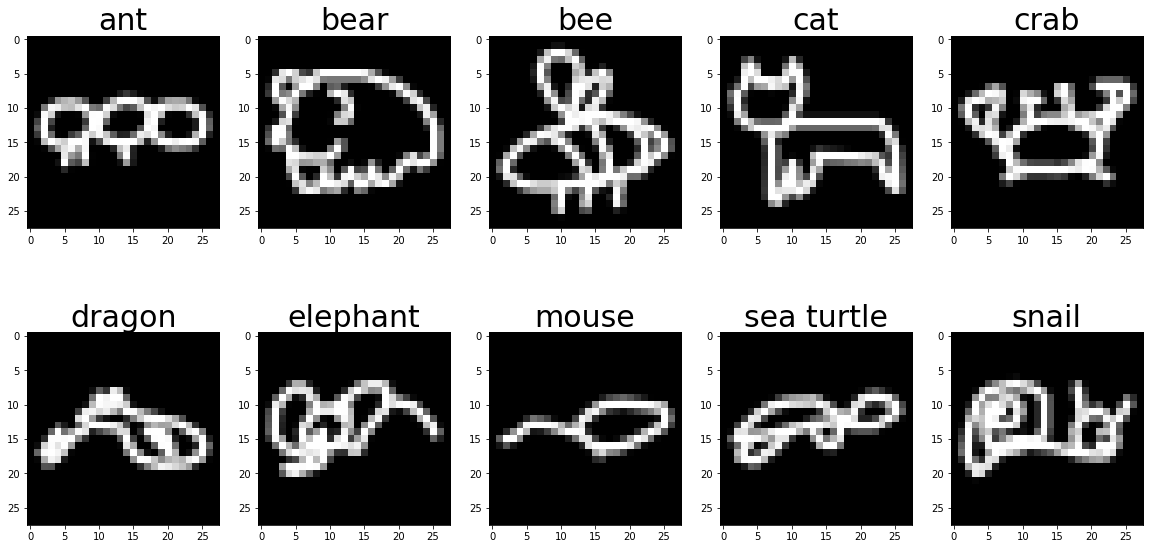

In [14]:
# a first glance
plt.figure(figsize=(20,10))

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.title(labels[i],fontsize=30)
    plt.imshow(X_train[(np.where(y_train==i))[0][0]],cmap='gray')
plt.show()

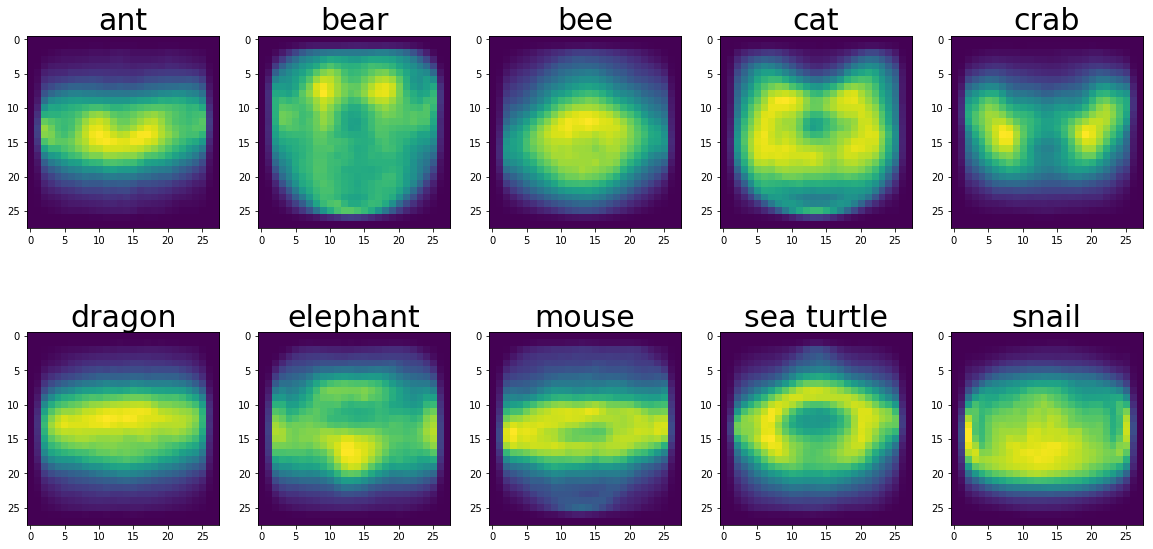

In [15]:
#look deeper in the image set
plt.figure(figsize=(20,10))
for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.title(labels[i],fontsize=30)
    plt.imshow(np.mean(X_train[(np.where(y_train==i))[0]],axis=0))
plt.show()

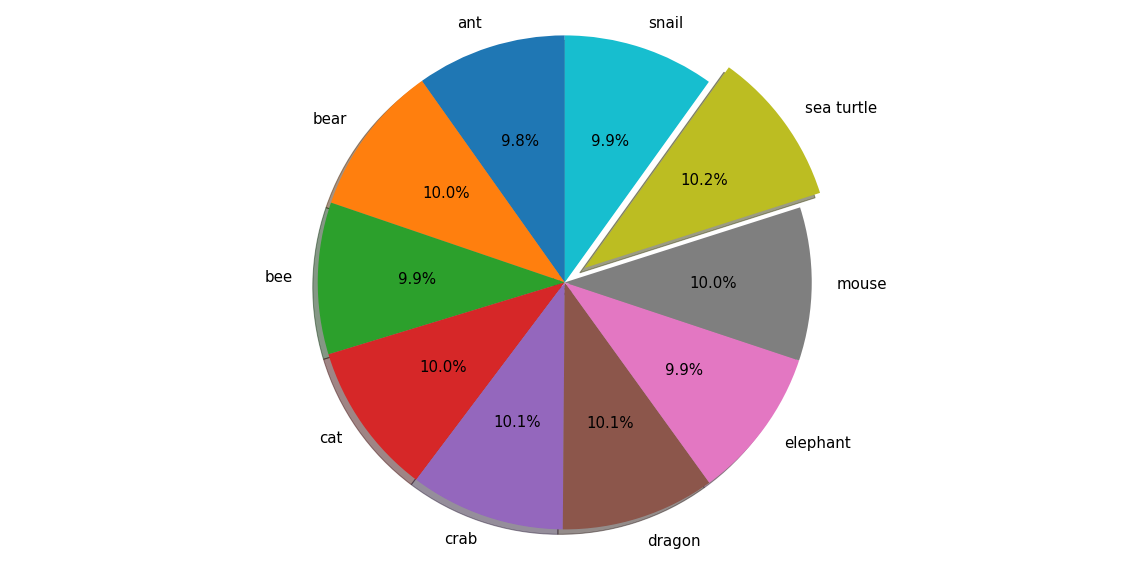

In [31]:
#if th data balance
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
num = []
for i in range(0,10):
    num.append(np.where(y_train==i)[0].shape[0])
    
labels = ['ant', 'bear', 'bee', 'cat', 'crab', 'dragon', 'elephant', 'mouse', 'sea turtle', 'snail']
sizes = num
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 15})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()